In [1]:
import nets , torch , utils
from    transformers    import  AutoTokenizer,AutoModel
import  dataloaders
import  torch
from    torch.utils.data    import  DataLoader


Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


       premise  hypothesis
label                     
c         2389        2389
e         2429        2429
n         2448        2448 

       premise  hypothesis
label                     
c          499         499
e          515         515
n          523         523 

       premise  hypothesis  hard(hypothesis)  hard(overlap)
label                                                      
c          510         510               510            510
e          519         519               519            519
n          535         535               535            535 



In [2]:
model = nets.CustomClassifier().to(utils.device)
model_name = 'bert-base-parsbert-uncased'
model .load_state_dict(torch.load('Model/'+model_name+'/'+model_name+'_00_10_valid_acc 78.4375.pt'))
model.eval()

CustomClassifier(
  (pretrainedmodel): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, 

In [3]:
test_dataloader = DataLoader(
                                                dataloaders.test_Set,
                                                batch_size=64,
                                                shuffle=True,
                                                num_workers=4,
                                                )

               precision    recall  f1-score   support

Contradiction       0.78      0.65      0.71       510
   Entailment       0.78      0.87      0.82       519
      Neutral       0.85      0.89      0.87       535

     accuracy                           0.81      1564
    macro avg       0.80      0.80      0.80      1564
 weighted avg       0.80      0.81      0.80      1564



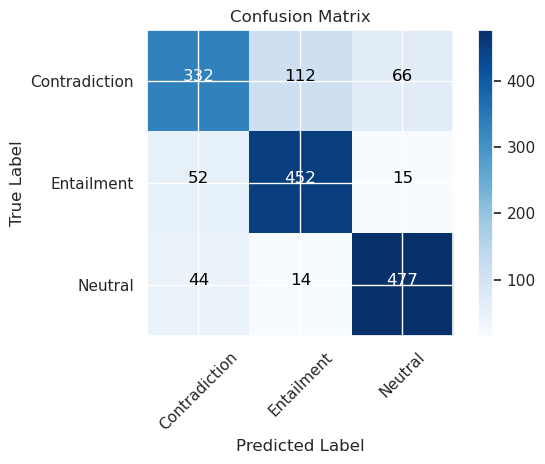

In [4]:
utils.generate_classification_report('Model/'+model_name+'/'+model_name,
                                    model, 
                                    test_dataloader,
                                    ['Contradiction','Entailment','Neutral'])